# Importing Libraries

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape
import random

Using TensorFlow backend.
/home/sagnik106/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sagnik106/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sagnik106/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sagnik106/.local/lib/python3.6/site-packages/tenso

# Import Data

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [3]:
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

In [4]:
xtrain=xtrain/255
xtest=xtest/255

In [5]:
xtrain=xtrain.reshape(xtrain.shape[0],784)
xtest=xtest.reshape(xtest.shape[0],784)
xtrain.shape

(60000, 784)

# DNN

In [6]:
def NN():
    model=Sequential()
    model.add(Dense(28*28,input_dim=28*28,activation = 'relu'))
    model.add(Dense(28*28,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [7]:
nn=NN()
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
nn_history=nn.fit(xtrain,ytrain,shuffle=True,epochs=4,batch_size=100,verbose=1,validation_data=(xtest,ytest))


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 11s 181us/step - loss: 0.1926 - accuracy: 0.9411 - val_loss: 0.0890 - val_accuracy: 0.9718
Epoch 2/4
60000/60000 [==============================] - 10s 159us/step - loss: 0.0727 - accuracy: 0.9780 - val_loss: 0.1492 - val_accuracy: 0.9585
Epoch 3/4
60000/60000 [==============================] - 10s 158us/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9788
Epoch 4/4
60000/60000 [==============================] - 10s 159us/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0836 - val_accuracy: 0.9755


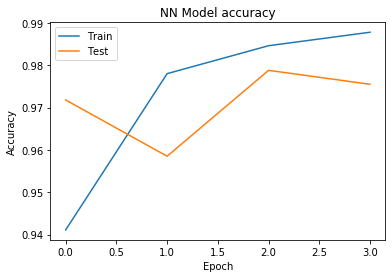

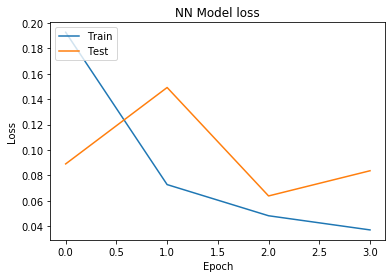

In [9]:
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('NN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('NN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN

In [10]:
def CNN():
    model=Sequential()
    model.add(Reshape((28,28,1), input_shape=(28*28,)))
    model.add(Conv2D(filters= 32, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(filters= 64, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(filters= 128, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
cnn=CNN()
cnn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)       

In [12]:
cnn_history=cnn.fit(xtrain,ytrain,shuffle=True,epochs=5,batch_size=32,verbose=1,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1152 - accuracy: 0.9639 - val_loss: 0.0445 - val_accuracy: 0.9856
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0371 - val_accuracy: 0.9886
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0374 - val_accuracy: 0.9889
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0444 - val_accuracy: 0.9876
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0317 - val_accuracy: 0.9917


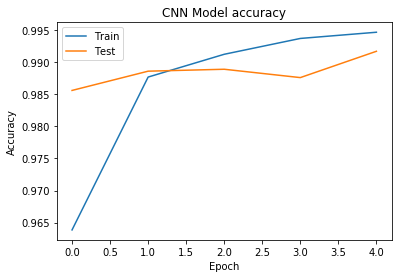

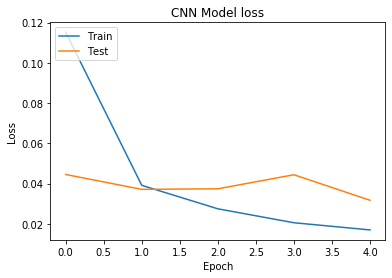

In [13]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing

In [14]:
import cv2

(28, 28)


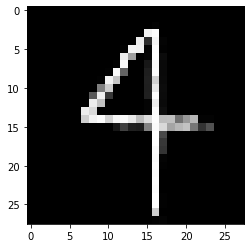

In [15]:
image=cv2.imread('%d.jpg'%(random.randint(2,7)),cv2.IMREAD_GRAYSCALE)
image=cv2.bitwise_not(image)
image=image[50:380,230:560]
image=cv2.resize(image,(28,28))
print(image.shape)
plt.imshow(image,cmap='gray')
image=image/255
image=image.reshape(1,28*28)

In [16]:
p=nn.predict(image)
p1=cnn.predict(image)

In [17]:
for i in range(0,10):
    print("%.5f"%p[0,i]); 

0.00001
0.00004
0.00014
0.00012
0.65385
0.00142
0.00002
0.00055
0.00147
0.34239


In [18]:
for i in range(0,10):
    print("%.5f"%p1[0,i]); 

0.00000
0.00000
0.00000
0.00000
1.00000
0.00000
0.00000
0.00000
0.00000
0.00000


In [19]:
pr=nn.predict_classes(image)

In [20]:
print(pr[0])

4


In [21]:
pr=cnn.predict_classes(image)

In [22]:
print(pr[0])

4


# Saving Models

In [23]:
nn.save("nn.h5")
cnn.save("cnn.h5")